# Introduction

In this jupyter notebook I will be exploring various features of python and its ability to perform data analysis on sets of data in which I will be presenting code and outputs from the code for various tasks which I feel are pertinent to the analysis. I will be exploring different features of various modules and provide examples of their use.

The data used in this analysis is the Ficher's iris dataset. Published in 1936 by Ronald Fischer, it has been used for the testing and development of classifcation methods and machine learning for decades. It consists of 50 instances of 4 measurements of 3 different flowers, totalling 600 datapoints, measuring sepal length, sepal width, petal length and petal width. Fischer developed methods of classifying these measurements using a linear discriminant model.

In this analysis I will go through various methods of representing the data and finally present a more modern classification method. 

# Imports

Here I import all the modules I need for the analysis. Modules or packages are collections of code that serve a specific purpose or provide functionality for your python code. These can be very large and can be extremely powerful. They are not used here but will be called on later on in the analysis.

In [1]:
# Imports

# Numpy for dealing with arrays

import numpy as np

# Pandas for dealing with dataframes

import pandas as pd

# MatPlotLib for creating plots

import matplotlib.pyplot as plt

# Colors from MatPlotLib for more control over colour schemes

from matplotlib import colors

# Seaborn for creating plots

import seaborn as sns

import statsmodels.api

# Data Loading

Here I import the data for analysis. I import the data found in the iris folder and assign names to the columns. To do this I use the pandas module, which provides powerful dataframe functionality. These dataframes are similar to excel spreadsheets with column and row names/indices. Creating clean, well-organised data frames helps greatly with analysis as, for example, some modules can take the column headings and turn them into axis labels directly. Pandas also has the ability to read from file, as demonstrated below. Later we will see it also write to file. 

I then print out a preview of first 5 lines of the data so I know what I'm working with.

In [2]:
# Loading data from file assigning names to the columns.

data = pd.read_csv(
    './iris/iris.data',
    names=[
        'Sepal Length in cm',
        'Sepal Width in cm',
        'Petal Length in cm',
        'Petal Width in cm',
        'Class'
    ]
)

# Print first 5 lines of the data

data.head()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## References used

- [pandas.read_csv Api Reference](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

Here I checked the read_csv documentation to help with importing the data correctly using the names keyword argument to add headers to my columns.

## Storing Variables

In this section, I have collected all of the variables I need for the various types of analysis I go through in the presentation. What you see here won't immediately be used but becomes useful later on. I need various slices of the data to make the most use of the module features; some modules prefer data to be represented differently, for example having a class column is useful in a module called seaborn to select hues, where in MatPlotLib it may get confused by the inclusion of this column.

In [3]:
# Getting the dataframe without the class column to perform analysis later.

data_no_class = data.drop(columns=['Class'])

# Separating the data by class.

setosa_data = data_no_class[0:50]
versicolor_data = data_no_class[50:100]
virginica_data = data_no_class[100:150]

# Separating by feature

sepal_length = data['Sepal Length in cm']
sepal_width = data['Sepal Width in cm']
petal_length = data['Petal Length in cm']
petal_width = data['Petal Width in cm']

# Separating by feature and species.

setosa_petal_length = setosa_data['Petal Length in cm']
setosa_petal_width = setosa_data['Petal Width in cm']
setosa_sepal_length = setosa_data['Sepal Length in cm']
setosa_sepal_width = setosa_data['Sepal Width in cm']

versicolor_petal_length = versicolor_data['Petal Length in cm']
versicolor_petal_width =  versicolor_data['Petal Width in cm']
versicolor_sepal_length = versicolor_data['Sepal Length in cm']
versicolor_sepal_width =  versicolor_data['Sepal Width in cm']

virginica_petal_length = virginica_data['Petal Length in cm']
virginica_petal_width =  virginica_data['Petal Width in cm']
virginica_sepal_length = virginica_data['Sepal Length in cm']
virginica_sepal_width =  virginica_data['Sepal Width in cm']

# Describing the Data

Here I export the description of the data to file. I then print out the description of the data.

In [4]:
# Getting data description.

description = data.describe()

# Exporting to csv file.

description.to_csv('iris.describe',sep=',')

# Print out the description of the data below.

description

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Here we can immediately see the power of Pandas. With a simple class method we get a huge amount of information about the data and how it is distributed. As we have created different slices of the information in the storing variables section, this method can be called to get more fine grained information about the data. Below, with a single line of code I can produce summary statistics for each of the features by species.

In [5]:
setosa_data.describe()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [6]:
versicolor_data.describe()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [7]:
virginica_data.describe()

,Sepal Length in cm,Sepal Width in cm,Petal Length in cm,Petal Width in cm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


## References used

- [Geeks For Geeks - How to export Pandas DataFrame to a CSV file?](https://www.geeksforgeeks.org/how-to-export-pandas-dataframe-to-a-csv-file/)

Here I checked a reference to see how to export to csv file.

# Creating Histograms

In this section I create histograms for each feature of the data that have custom colouring for each bar based on its relative size. This is done using MatPlotLib.

While a lot can be produced with minimal lines of code, in this section I demonstrate the power and ability of customisation options available.

Here is an example of producing a graph with minimal code. It lacks any differentiation between the graphs and has no labels, titles or headings.

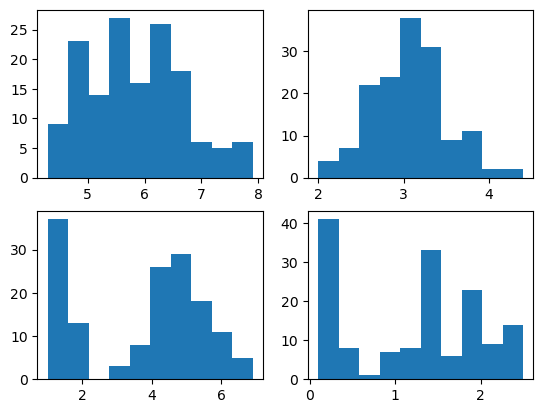

In [8]:
# Creating a 2x2 grid of plots

fig, ax = plt.subplots(2,2)

# Creating basic histograms with no customisation.

ax[0,0].hist(sepal_length)
ax[0,1].hist(sepal_width)
ax[1,0].hist(petal_length)
ax[1,1].hist(petal_width)

# Show figure.

plt.show()

The plots are highly customisable and can be assigned various colours titles and labels as you can see in the next example. The graph produced is significanty different, the features are immediately identifiable as separate and are a pleasure to look at.

These graphs can also be exported to file, as you can see at the end of this block of code.

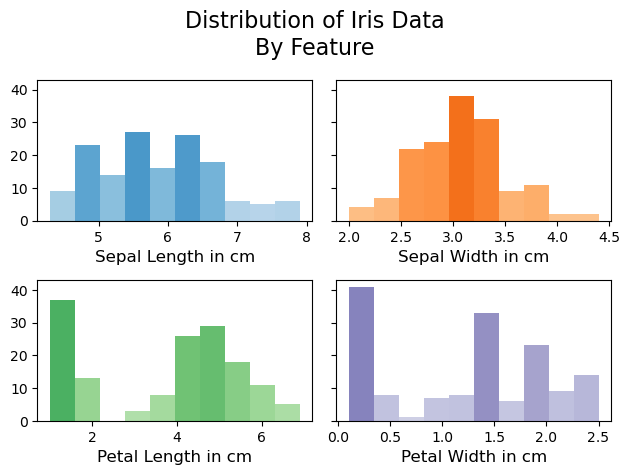

In [9]:
# Creating a 2 by 2 grid of plots that share a y axis 
# with the padding around the plots adjusted.

fig, ax = plt.subplots(2,2, tight_layout=True, sharey=True)

# Creating histograms in each of the 4 plots.
# The hist function returns 3 elements: 
# N: The values of the histogram bins.
# bins: The edges of the bins.
# patches: Container of individual artists used to create the histogram.

N, bins, patches = ax[0,0].hist(x=sepal_length)

# Setting label for the axis.

ax[0,0].set_xlabel('Sepal Length in cm', fontsize=12)

# Getting a fraction of the maximum for each bin so they can be colour coded later

fracs = N/N.max()

# Setting the colour map to span the full range of values
# by linearly mapping the values in the selected interval
# to values between 0 and 1.

norm = colors.Normalize(fracs.min(), fracs.max())

# Looping through the objects and setting colours for each 
# based on the fractions calculater earlier.
# The fraction has been slightly altered to take just a 
# section of the colour map so they aren't too dark or too light.

for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Blues(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

# Process repeated for each axis.

N, bins, patches = ax[0,1].hist(x=sepal_width)
ax[0,1].set_xlabel('Sepal Width in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Oranges(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

N, bins, patches = ax[1,0].hist(x=petal_length)
ax[1,0].set_xlabel('Petal Length in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Greens(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

N, bins, patches = ax[1,1].hist(x=petal_width)
ax[1,1].set_xlabel('Petal Width in cm', fontsize=12)

fracs = N/N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    colour = plt.cm.Purples(norm(thisfrac)*0.3+0.3)
    thispatch.set_facecolor(colour)

# Creating a title and setting fontsize and placement.

fig.suptitle('Distribution of Iris Data\nBy Feature', fontsize=16)

# Exporting to png file.

plt.savefig('histogram.png')
plt.show()


## References used:

- [Pyplot Tutorial](https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py)

I used this tutorial to get some inspiration as to how to create plots most effectively and how best to organise my code.

- [Histograms Examples](https://matplotlib.org/stable/gallery/statistics/hist.html)

Here I checked examples of histogram uses to see how they were used and to see if there were any options I wanted to include in my implementation. 

- [Histogram Examples - Updating histograms colors section](https://matplotlib.org/stable/gallery/statistics/hist.html#updating-histogram-colors)

I implemented some of the colour selection from the example and edited it to include the colours I plan to use in this series of tasks.

- [API Reference - matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

I checked the documentation for pyplot.hist to understand what the function returns and to understand the implemented code better.

- [Choosing Colormaps in Matplotlib](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

This link contains examples of the available colour maps, how to choose them and how to impliment them. I used it to make an decision about which colour mapping I would like to use in this case.

- [Stack Overflow question - Why does my xlabel not show up?](https://stackoverflow.com/questions/30019671/why-does-my-xlabel-not-show-up-its-not-getting-cut-off)

I found this page while trying to research why some of the axis labels were not displaying properly. From this I took the tight_layout=True option when creating the axes. It helped to display the axes labels.

- [API Reference matplotlib.pyplot.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html#matplotlib.pyplot.subplots)

This reference contains the documentation for subplots. It helped me to set up four individual axes in one figure. It made me aware of the sharey option which was implemented here.

- [matplotlib Subplots Axes and Figures Example](https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/figure_title.html)

This example helped me to get neater title text and to understand how to set figure and axis titles.

# Creating KDE Plots With Seaborn

While visually appealing I have to question the usefulness of this graph. While it shows the distribution of the data, it does not include any information about the different classes. Perhaps a better graph would include the the different classes in the representation.

Seaborn is very powerful and can create complex plots and figures from very little code as long as the data it is working with is correctly layed out.

Seaborn automatically creates these plots based on this data, includes a legend and labels the axes.

Text(0.5, 0.98, 'Iris Data')

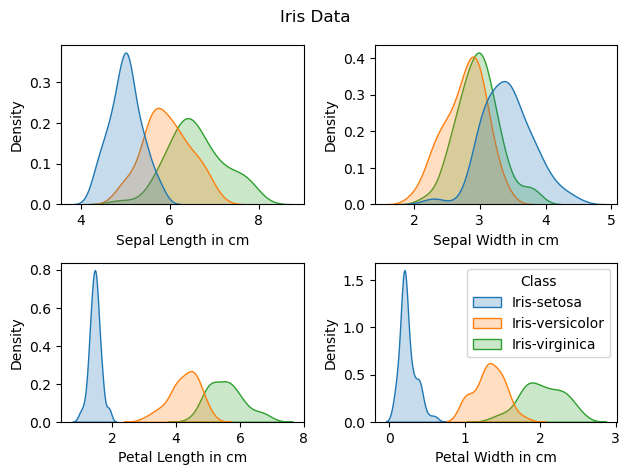

In [10]:
# Create 2x2 grid of plots

fig, axs = plt.subplots(2, 2, tight_layout=True)

# Create KDE plots in each quadrant of the figure,
# assigning x values, 
# assigning hue by class, 
# choosing to fill the plot and 
# choosing which colour palette to use.

sns.kdeplot(ax=axs[1,1], data=data, x='Petal Width in cm', hue='Class', fill=True, palette='tab10')
sns.kdeplot(ax=axs[1,0], data=data, x='Petal Length in cm', hue='Class', fill=True, palette='tab10')
sns.kdeplot(ax=axs[0,1], data=data, x='Sepal Width in cm', hue='Class', fill=True, palette='tab10')
sns.kdeplot(ax=axs[0,0], data=data, x='Sepal Length in cm', hue='Class', fill=True, palette='tab10')

# Disabling legend for 3 of the 4 plots

for ax in [axs[0,0], axs[0,1], axs[1,0]]:
    ax.get_legend().set_visible(False)

# Adding a title to the figure

fig.suptitle("Iris Data")

I feel that a plot such as this better represents the data since the classes of flower are clearly represented by different colours. This allows the data to be understood more readily and easily at a glance.

References used:

- [seaborn.kdeplot Documentation](https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

Here I checked the keyword for colourmapping the plots. It also helped to look through the examples to see how best to impliment the plots.

- [Statology - How to Create Subplots in Seaborn (With Examples)](https://www.statology.org/seaborn-subplots/)

Here I learned how to map seaborn plots to matplotlib subplot axes.

- [Stack Overflow Question - Hide legend from seaborn pairplot](https://stackoverflow.com/questions/54781243/hide-legend-from-seaborn-pairplot)

Here I learned how to hide a legend on a seaborn plot.


# Creating Box Plots



Box plots are another feature of MatPlotLib. They visualise some of the data we saw using the pandas describe method earlier. It shows the median, first and third quartiles and whiskers that extends either to the last data point or up to 1.5 times the quartile past the first and third quartiles. Any data points past this are represented by what are called fliers.

Again these are fully customisable. According to the MatPlotLib documentation, calling the boxplot function returns a dictionary that contains all of the customisable settings. I take advantage of that here to create a fully coloured model of the different features of each species of iris.

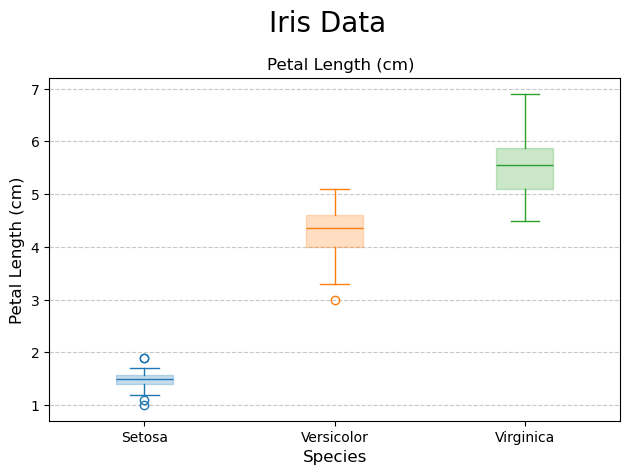

In [11]:
# Creating figure.

fig, ax = plt.subplots(tight_layout=True)

# Creating NumPy array for boxplot.

petal_length_by_species = np.array([setosa_petal_length, versicolor_petal_length, virginica_petal_length])

# Creating boxplot, using transposed array and coloured boxes.

bp = ax.boxplot(petal_length_by_species.T, patch_artist=True)

# Individual boxplot colour settings in returned dictionary.

bp['medians'][0].set_color('tab:blue')
bp['boxes'][0].set_color('tab:blue')
bp['boxes'][0].set_alpha(0.25)
bp['whiskers'][0].set_color('tab:blue')
bp['whiskers'][1].set_color('tab:blue')
bp['caps'][0].set_color('tab:blue')
bp['caps'][1].set_color('tab:blue')
bp['fliers'][0].set_markeredgecolor('tab:blue')
bp['medians'][1].set_color('tab:orange')
bp['boxes'][1].set_color('tab:orange')
bp['boxes'][1].set_alpha(0.25)
bp['whiskers'][2].set_color('tab:orange')
bp['whiskers'][3].set_color('tab:orange')
bp['caps'][2].set_color('tab:orange')
bp['caps'][3].set_color('tab:orange')
bp['fliers'][1].set_markeredgecolor('tab:orange')
bp['medians'][2].set_color('tab:green')
bp['boxes'][2].set_color('tab:green')
bp['boxes'][2].set_alpha(0.25)
bp['whiskers'][4].set_color('tab:green')
bp['whiskers'][5].set_color('tab:green')
bp['caps'][4].set_color('tab:green')
bp['caps'][5].set_color('tab:green')

# Setting labels and titles.

plt.suptitle('Iris Data', fontsize=20, x=0.52)
ax.set_title("Petal Length (cm)", fontsize=12, x=0.51)
ax.set_xlabel("Species", fontsize=12)
ax.set_ylabel("Petal Length (cm)", fontsize=12)

# Labelling each group.

ax.set_xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"], fontsize=10)

# Adding grid lines.

ax.grid(axis="y", linestyle="--", alpha=0.7)

# Show figure.

plt.show()

Fliers are often seen as outliers as they fall outside 2.5 quartiles of the median and can often be discared as such. For the purposes of this analysis I have not discared them.

Box plots are powerful as they can give similar information to the describe method but in visual, immediately humanly-parsable information at a glance.

The ability to colour these plots is not to be underestimated; changing the colours make the plots more easily understood and colour coding can be referenced in further plots.

## References used:

- [API Reference - matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)

Exploring the boxplot documentation to understand what it returns, how to access individual settings, best practices and the available options while creating box plots.

- [numpy.array Documentation](https://numpy.org/doc/stable/reference/generated/numpy.array.html)

Here I checked the documentation for a numpy array so I could properly create an array that could be used by the boxplot function.

- [matplotlib Box Plots Examples](https://matplotlib.org/stable/gallery/statistics/boxplot_color.html)
- [Stack Overflow Thread: Pandas boxplot: set color and properties for box, median, mean](https://stackoverflow.com/questions/35160956/pandas-boxplot-set-color-and-properties-for-box-median-mean)
- [Stack Overflow Thread: Flier colors in boxplot with matplotlib](https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib)

These references helped me to understand how to colour the individual parts of the box plots.


# Creating a Scatter Plot

In this section I create a scatter plot of Sepal Length by Sepal width using matplotlib. Each class of iris is coloured differently so they are identifiable on the scatter plot.

Additionally I have colour coded the plots to have the same colours as the last plot so the features are immediately distinguishable.

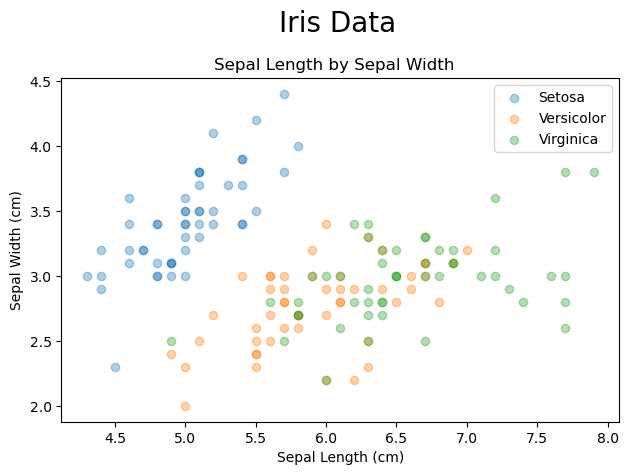

In [12]:
# Creating a single plot with adjusted padding.

fig, ax = plt.subplots(tight_layout=True)

# Creating scatter plots for each of the target variables in different colours on the same axis.
# Using c= to set marker colour and label for each variable rather than using colour mapping.

ax.scatter(setosa_sepal_length,setosa_sepal_width, c='tab:blue', label='Setosa', alpha=0.35)
ax.scatter(versicolor_sepal_length,versicolor_sepal_width, c='tab:orange', label='Versicolor', alpha=0.35)
ax.scatter(virginica_sepal_length,virginica_sepal_width, c='tab:green', label='Virginica', alpha=0.35)

# Setting labels for the axis.

ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')

# Displaying legend.

ax.legend()

# Setting title for figure and plot.

plt.suptitle('Iris Data', fontsize=20, x=0.535)
plt.title('Sepal Length by Sepal Width', x=0.49)
plt.show()

## References used

- [matplotlib Examples - List of Named Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)

I used this reference to implement colours for each species of iris in the scatter plot.

# Using Seaborn

In this section I create a seaborn pair plot of each of the features, and displaying them as scatter and kernel density plots.

This is another example where very few lines of code can produce outstanding amounts of visual data.

Text(0.5, 1, 'Iris Flowers by Feature')

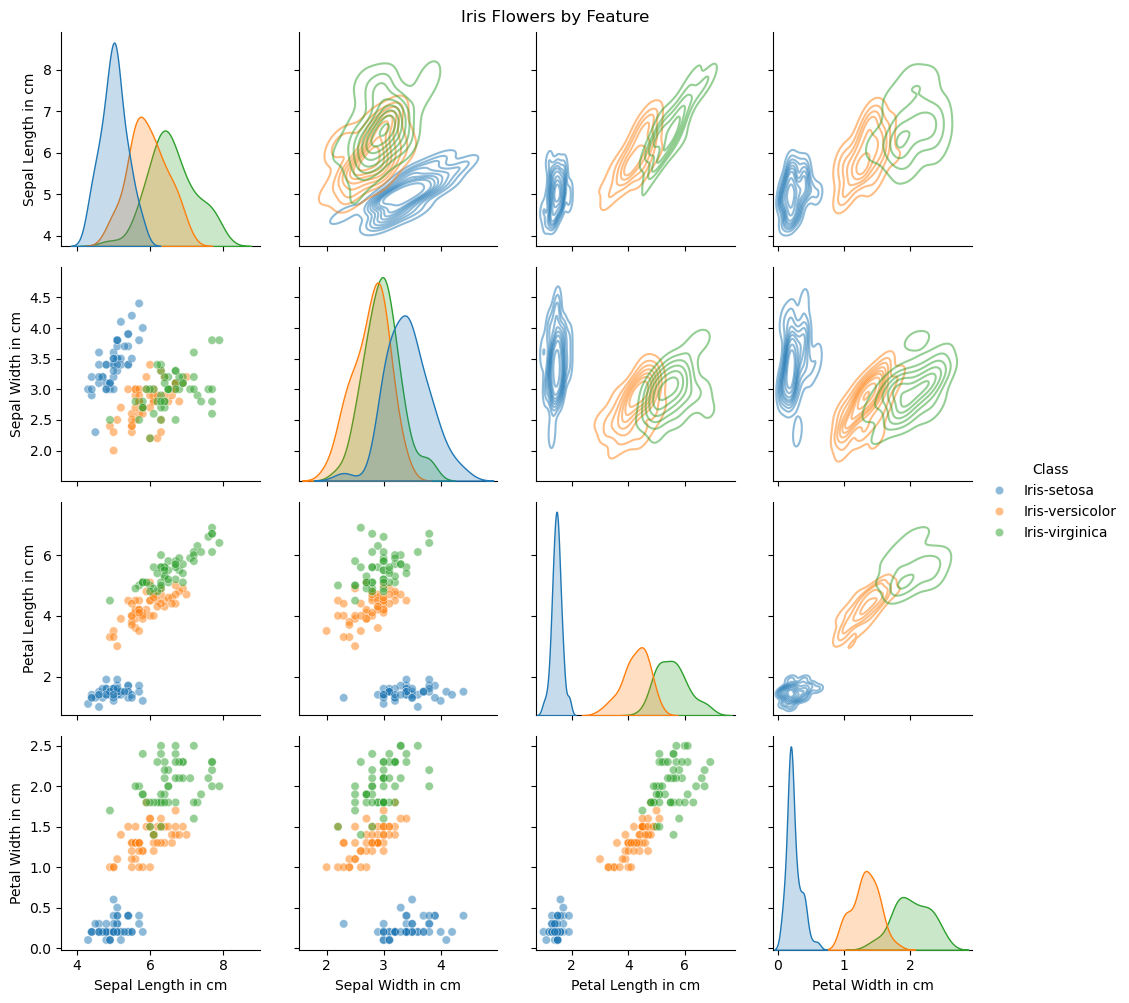

In [13]:
grid = sns.PairGrid(data, hue='Class', diag_sharey=False, layout_pad=0.5)
grid.map_upper(sns.kdeplot, alpha=0.5)
grid.map_lower(sns.scatterplot, alpha=0.5)
grid.map_diag(sns.kdeplot, fill=True)
grid.add_legend()
grid.figure.suptitle('Iris Flowers by Feature', y=1)


For ease of understanding I have kept the colours the same throughout, however the colour schemes are fully customisable as with most aesthetics in these examples.

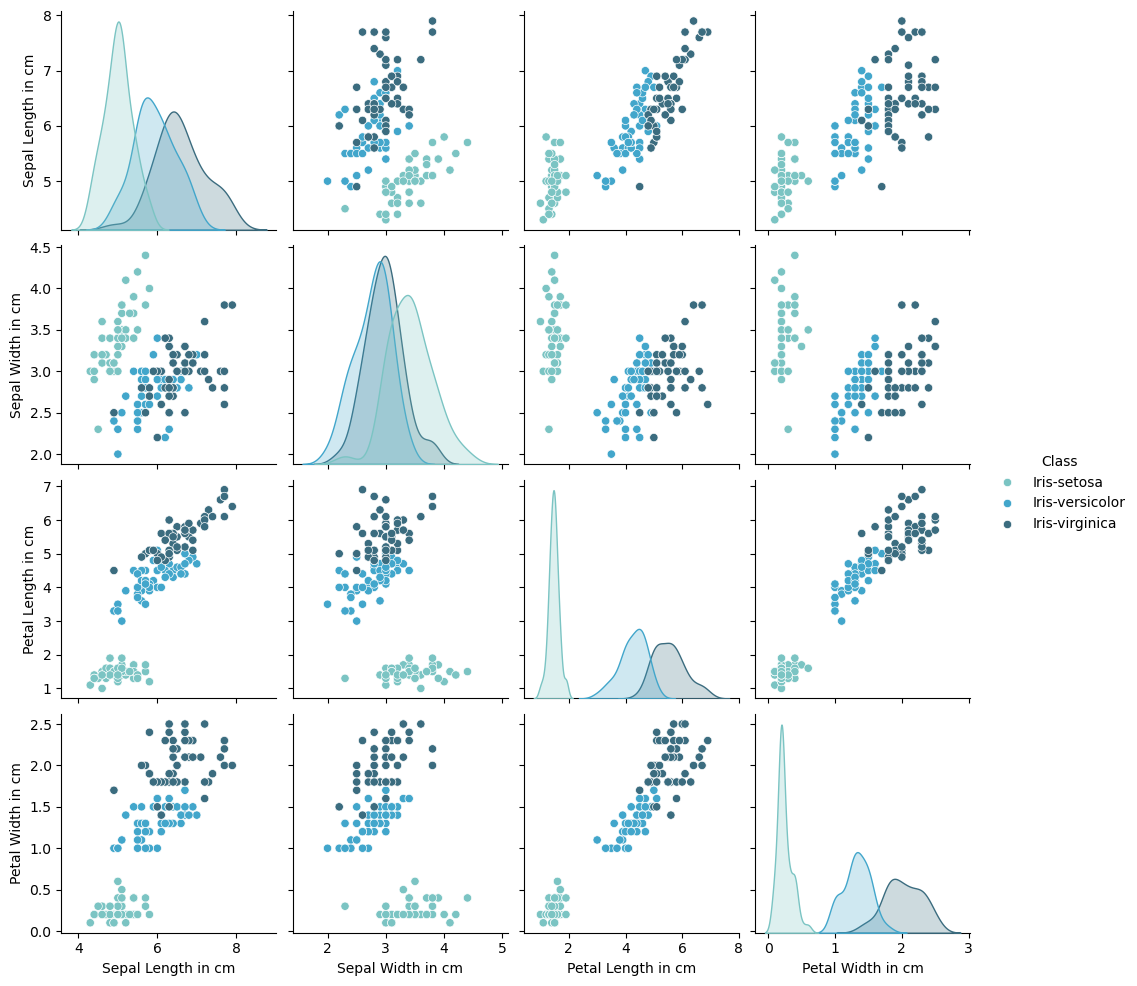

In [14]:
grid = sns.pairplot(data, hue='Class', palette="GnBu_d")

## References used 

- [seaborn.pairplot API Reference](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Looking through the seaborn documentation for pairplot, I found the hue keyword argument which I implemented here to separate the classes in the displayed pair plot.

- [seaborn.PairGrid Api Reference](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)

In the PairGrid documentation I found ways of displaying different types of plots in the same grid using map_upper and map_lower. I also learned how to set the diagonal not to share y so that the kde plots on the diagonal took up all the space available to give a better representation of the data.

- [Stack Overflow Question: How to show the title for the diagram of Seaborn pairplot() or PridGrid()](https://stackoverflow.com/questions/36813396/how-to-show-the-title-for-the-diagram-of-seaborn-pairplot-or-pridgrid)

This reference helped me to understand how to set a title for a pairgrid using the grid.figure attribute.

- [Seaborn Tutorial: Axis Grids](https://seaborn.pydata.org/tutorial/axis_grids.html)

In this reference I found an example of how to add additional keyword arguments to plots called in the map functions and implimented the fill=True for the diagonal kernel density plots and the alpha=0.5 for the other plots.

# Heatmap of Pearson Correlation Coefficients

In this section I use matplotlib to create heatmaps of the Pearson correlation coefficients - a number between -1 and 1 that measures how closely correlated a set of data is, that is how well the data fits on a line of best fit.

This will allow the user to see how well correlated every feature of the data is at a glance.

The [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) can be calculated using the covariance and standard deviation of a population. According to [this reference](https://whatissixsigma.net/confidence-intervals-why-n30-is-acceptable-as-population-representative/), a sample of size 30 and above can be considered a population. The Pearson Correlation Coefficient or $\rho$ can be calculated as follows:

${\displaystyle \rho _{X,Y}={\frac {\operatorname {cov} (X,Y)}{\sigma _{X}\sigma _{Y}}}}$

This can be found directly using the ```pandas.DataFrame.corr()``` method in pandas.

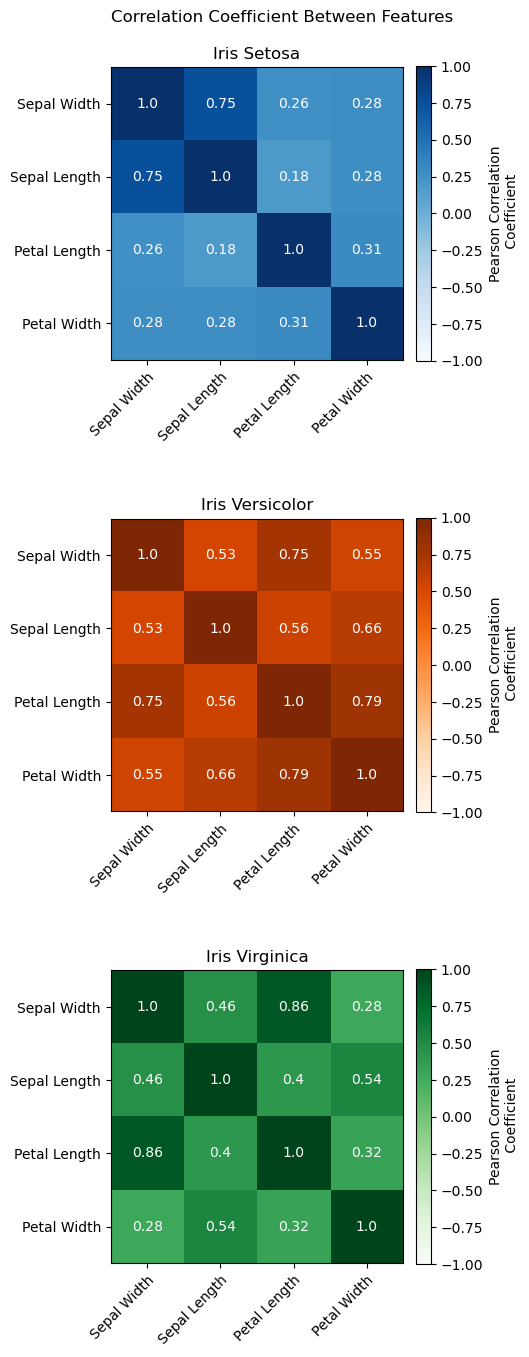

In [15]:
# Finding the pearson correlation values for each feature.

setosa_corr = setosa_data.corr()
versicolor_corr = versicolor_data.corr()
virginica_corr = virginica_data.corr()

# Creating feature name list.

feature_names = ["Sepal Width", "Sepal Length", "Petal Length", "Petal Width"]

# Turning correlation coefficient dataframes into arrays and rounding to 2 decimal places.

array_setosa = np.array(setosa_corr.round(2))
array_versicolor = np.array(versicolor_corr.round(2))
array_virginica = np.array(virginica_corr.round(2))

# Creating 3 subplots.

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 14))

# Setting figure title and layout.

fig.suptitle("Correlation Coefficient Between Features")

# Setting x and y labels for all axes.

for ax in [ax1, ax2, ax3]:
    ax.set_xticks(range(len(feature_names)), labels=feature_names,
                rotation=45, ha="right", rotation_mode="anchor")
    ax.set_yticks(range(len(feature_names)), labels=feature_names)

# Creating heatmap and colourbar.
# Setting colourmap, min and max values for colourbar.
# Setting colourbar size and label

im1 = ax1.imshow(array_setosa, cmap='Blues', vmin=-1, vmax=1)
cb1 = ax1.figure.colorbar(im1, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

# Labeling heatmap sections.

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax1.text(j, i, array_setosa[i, j],
                       ha="center", va="center", color="w")
        
# Adding title for axis.

ax1.set_title("Iris Setosa")

# Repeating above for each species.

im2 = ax2.imshow(array_versicolor, cmap='Oranges', vmin=-1, vmax=1)
cb2 = ax2.figure.colorbar(im2, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax2.text(j, i, array_versicolor[i, j],
                       ha="center", va="center", color="w")
        
ax2.set_title("Iris Versicolor")

im3 = ax3.imshow(array_virginica, cmap='Greens', vmin=-1, vmax=1)
cb3 = ax3.figure.colorbar(im3, fraction=0.046, pad=0.04, label='Pearson Correlation\n Coefficient')

for i in range(len(feature_names)):
    for j in range(len(feature_names)):
        text = ax3.text(j, i, array_virginica[i, j],
                       ha="center", va="center", color="w")
        
ax3.set_title("Iris Virginica")

fig.tight_layout()
plt.show()

## References used

- [API Reference - pandas.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

The corr method in pandas computes pairwise correlation of columns, excluding NA/null values. It's default method is to calculate the pearson correlation coefficient.

- [Annotated Heatmap Example](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html)

I used this reference to find best practice for creating heatmaps. I used some code from the first example. 

- [Stack Abuse - Calculating Pearson Correlation Coefficient in Python with Numpy](https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/)

This reference was used to understand how to find pearson correlation coefficient in python.

- [API Reference - matplotlib.pyplot.colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html)

The documentation for colour bars helped me to set the limits and labels for the colour bar.

# Lines of Best Fit

Seaborn and matplotlib are not mutally exclusive, they can be combined to create powerful plots.

An unsung hero of data analysis is numpy. Numpy provides many features which can give us poweful insights into the data. One such tool is the polynomial tool which fits lines to data.

In this section I fit lines of best fit to the data using numpy and lay it over a scatter and kde plot using both matplotlib and seaborn.

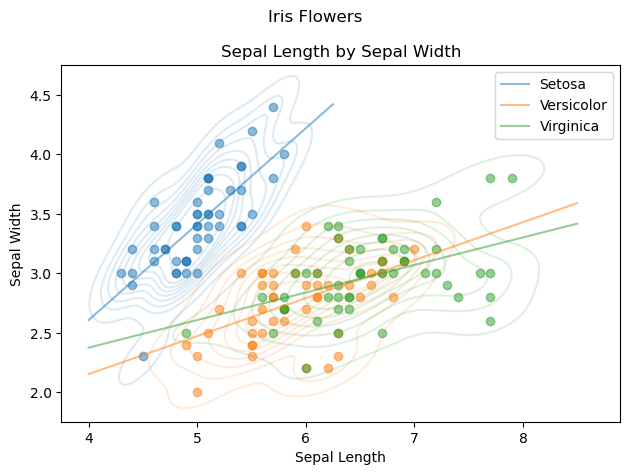

In [16]:
# Creating figure and axis

fig, ax = plt.subplots(tight_layout=True)

# Adding Seaborn kernel density plot

sns.kdeplot(data=data, x='Sepal Length in cm', y='Sepal Width in cm', hue='Class', alpha=0.15)

# Setting title and axis labels

fig.suptitle('Iris Flowers')
ax.set_title('Sepal Length by Sepal Width')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')

# Setting y limits for a cleaner graph

ax.set_ylim(1.75, 4.75)

# Scatter plots

ax.scatter(setosa_sepal_length, setosa_sepal_width, color='tab:blue', alpha=0.5, marker='o')
ax.scatter(versicolor_sepal_length, versicolor_sepal_width, color='tab:orange', alpha=0.5, marker='o')
ax.scatter(virginica_sepal_length, virginica_sepal_width, color='tab:green', alpha=0.5, marker='o')

# Getting line of best fit polynomial

setosa_sepal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(setosa_sepal_length, setosa_sepal_width, 1)
versicolor_sepal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(versicolor_sepal_length, versicolor_sepal_width, 1)
virginica_sepal_length_sepal_width_polynomial = np.polynomial.polynomial.Polynomial.fit(virginica_sepal_length, virginica_sepal_width, 1)

# Plotting line of best fit

range_sepal_length_sepal_width = np.linspace(4, 8.5, 6)
range_sepal_length_sepal_width_setosa = np.linspace(4, 6.25, 6)

ax.plot(range_sepal_length_sepal_width_setosa,setosa_sepal_length_sepal_width_polynomial(range_sepal_length_sepal_width_setosa), label='Setosa', alpha=0.5)
ax.plot(range_sepal_length_sepal_width,versicolor_sepal_length_sepal_width_polynomial(range_sepal_length_sepal_width), label='Versicolor', alpha=0.5)
ax.plot(range_sepal_length_sepal_width,virginica_sepal_length_sepal_width_polynomial(range_sepal_length_sepal_width), label='Virginica', alpha=0.5)

# Show legend and plot

plt.legend()
plt.show()

It is clear from the plots that iris setosa is easily separated from the other two classes while the other two classes seem to be somewhat entangled. From the pairplot in the Using Seaborn section, output 13, we can see that the other features, other than sepal width would be better used to predict to which class a value may belong. 

# Machine Learning

Python has many capabilities, in terms of data visualisation. It also has poweful calculations reduced to short lines of code. The possibilities are vast and varied without sacrificing anything to do with visual output; it is possible to create visually appealing plots that are give meaningful, immediately discernable information. 

Additionally it is possible with machine learning to create models that can predict the class of a set of values. A worked example can be seen [here](https://data-flair.training/blogs/iris-flower-classification/), in which a support vector machine aproximates a hyperplane between the classes to correctly predict the class of an input with 97% accuracy, with very few lines of code. The worked example can be seen below:

In [17]:
# Separating the features and target classes

data_values = data.values
X = data_values[:,0:4]
Y = data_values[:,4]

The data is split into data that trains the model and data that is used later to test the model. Depending on how the data is split the result can vary; the accuracy score for the model, seen later, can vary considerably depending on how the data is split.

In [18]:
# Split the data to train and test dataset.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Here the support vector machine is created and uses the training dataset to teach the model. It then creates the hyperplanes - lines that separate the classes.

In [19]:
# Support vector machine algorithm

from sklearn.svm import SVC

svn = SVC()
svn.fit(X_train, y_train)

SVC()

Using these hyperplanes it then attempts to categorise the data using the test data from the data split earlier. It scores its own attempt to categorise the data using these hyperplanes.

In [20]:
# Predict from the test dataset

predictions = svn.predict(X_test)

# Calculate the accuracy

from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.9333333333333333

A more detailed report can be seen below. 

$ Precision = \frac{True Positives (TP)}{True Positives (TP) + False Positives (FP)}$

$ Recall = \frac{True Positives (TP)}{True Positives (TP) + False Negatives (FN)}$

$ F1-Score = 2 \times \frac{Precision\times Recall}{Precision + Recall} $

Precision is a measure of positive predictions, both true and false positives while recall is a the ratio of true positives to true positives and false negatives. F1-Score combines both to give a more balanced report of the accuracy of the model.

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.82      0.90        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        30
   weighted avg       0.94      0.93      0.93        30



Once the model is created, it is possible to input values directly and ask the model to predict to which class the input value belongs.

In [22]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


## References Used

- [Data Flair - Iris Flower Classification](https://data-flair.training/blogs/iris-flower-classification/)

This is the linked worked example that this code was taken from.

- [Duck.ai prompt - 'precision recall f1 score' and 'Tell me more'](https://duckduckgo.com/?q=precision+recall+f1+score&ia=chat)

With this promt the Duck.ai returned the values with which precision, recall and f1-score were calculated. I was able to include these formulae and describe them in my own words.

# Conclusion

What you have seen here is just scratching the surface of what is possible with python and data analysis. Its capabilities range from calculating specific values, from standard deviation to mean, to creating detailed and meaningful plots, and predicting the classification of values provided to a model.

The value python adds to data analysis is vast and varied. It is modular and customisable - interesting and visually appealing plots are easily produced. It is powerful and efficient - with very little input extremely detailed and insightful results can be created. No matter the data, python has something to offer.



# End